In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = pd.read_csv("avocado.csv.zip")
file.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


in this data the  rows and  columns which is combination of countinuous and categorical data and one is target variableand other isdependent variables

In [3]:
file.shape

(18249, 14)

In [3]:
# there is one unnammed columns which is totally waiste and not contribute hence delete this and also year is nominal data henceremove
file.drop(['Unnamed: 0','year'],axis=1,inplace=True)

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  region        18249 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.7+ MB


In [5]:
# checking the value counts in the columns
for i in file.columns:
    print(file[i].value_counts())
    print("\n")

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
37815

In [4]:
file.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

there is no null vlaues present in dataset so proceed with this

In [5]:
#converting the datatype of date column from object to datetime
file['Date']= pd.to_datetime(file.Date,format='%Y-%m-%d')
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 1.7+ MB


In [5]:
#checking of no.of unique values in each column
file.nunique().to_frame("no oof unique values")


,no oof unique values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


In [6]:
#again checking info
file.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
region                  object
dtype: object

In [6]:
#setting date as dataframe index
file.set_index('Date', inplace= True)
file.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [10]:
#checking numerical columns
numerical_col=[]
for i in file.dtypes.index:
    if file.dtypes[i]=='float64':
        numerical_col.append(i)
print('numerical columns:',numerical_col) 

numerical columns: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


In [7]:
# lets check statistic od dataset
file.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


in thhis we see no nan value present so nice to proceed
1) there are somecolumns in which standard deviationd more than mean hence possibliyyto outlier present
2) we also check skewness of data and all other values is well manner

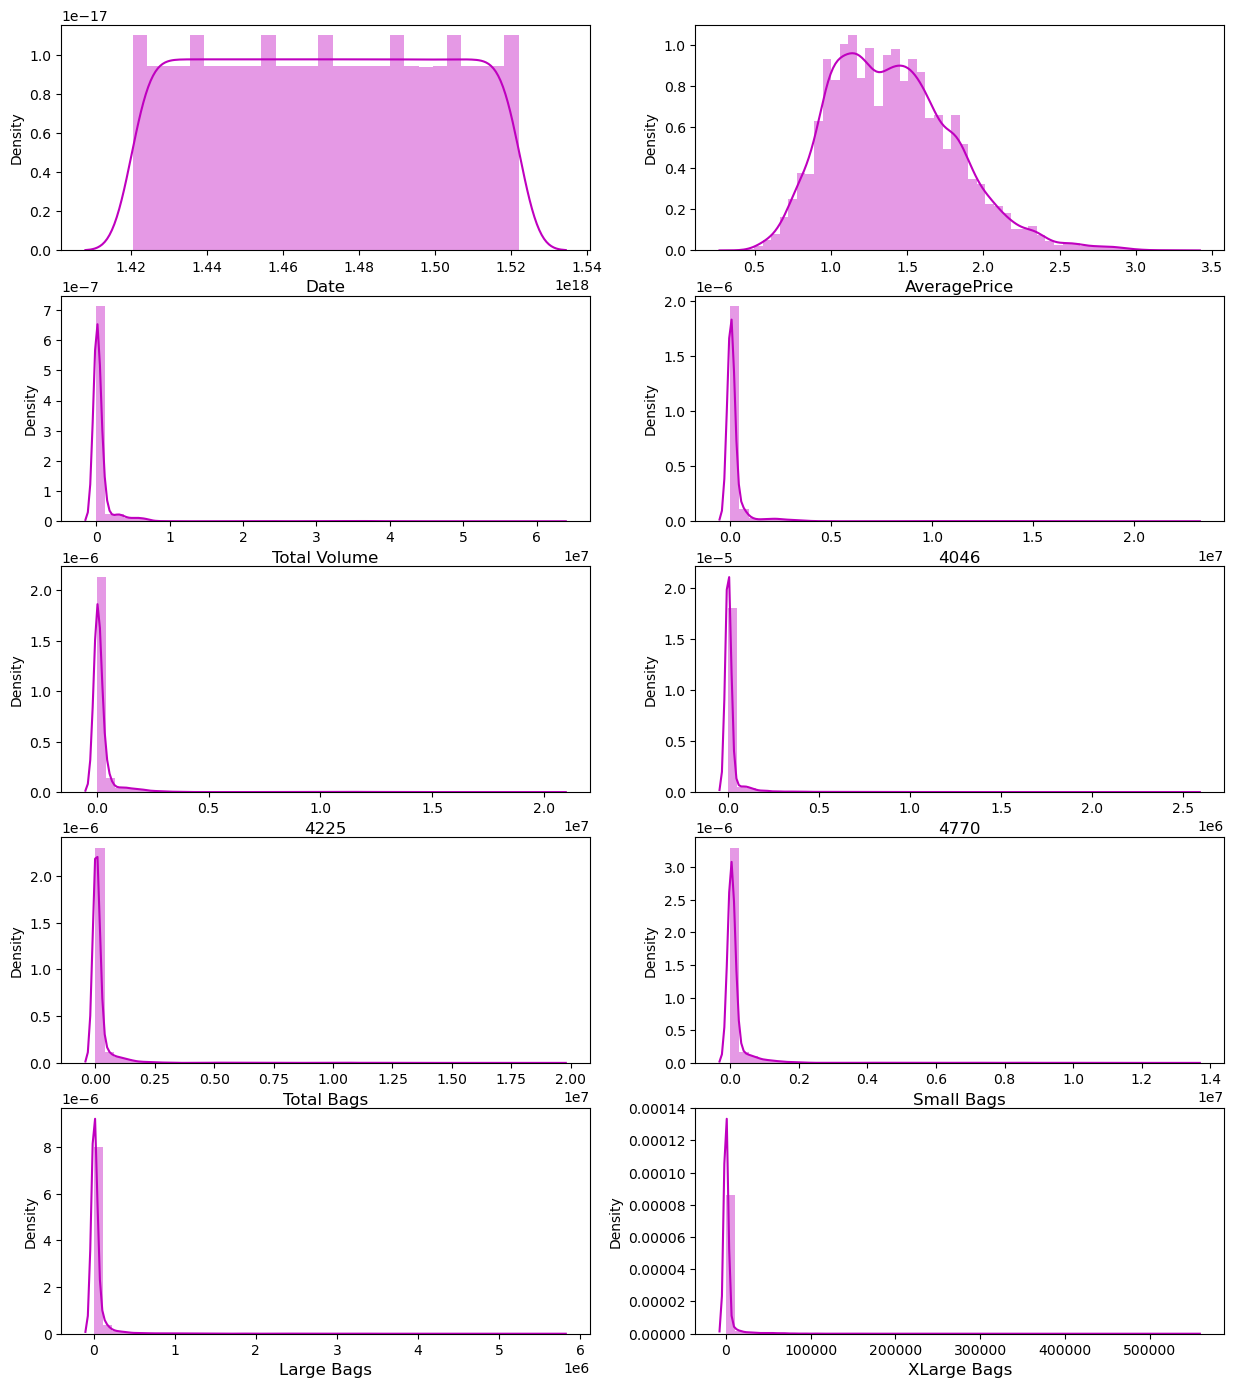

In [12]:
# checking the distribution through graph of data in each continuous coulmns
plt.figure(figsize=(15,17), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(file[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()  

more columns are skewed in data hence remove this for better performance

In [8]:
file.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [9]:
#apply cube root method to remove skewness in volume
file['Total Volume']= np.cbrt(file['Total Volume'])
file['4046']= np.cbrt(file['4046'])
file['4225']= np.cbrt(file['4225'])
file['4770']= np.cbrt(file['4770'])
file['Total Bags']= np.cbrt(file['Total Bags'])
file['Small Bags']= np.cbrt(file['Small Bags'])
file['Large Bags']= np.cbrt(file['Large Bags'])
file['XLarge Bags']= np.cbrt(file['XLarge Bags'])

In [10]:
file.skew()

AveragePrice    0.580303
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
dtype: float64

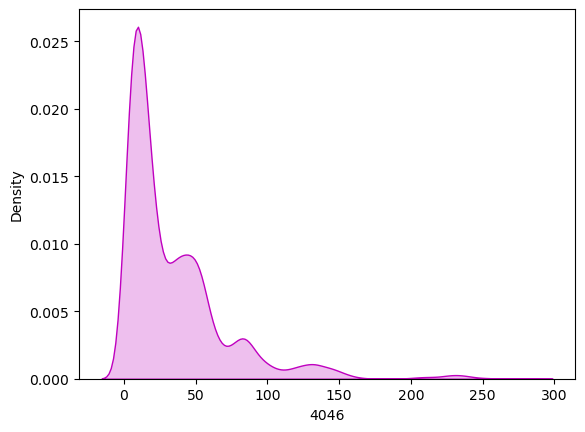

In [9]:
sns.distplot(file['4046'],color='m',kde_kws={'shade':True}, hist = False)
plt.show()

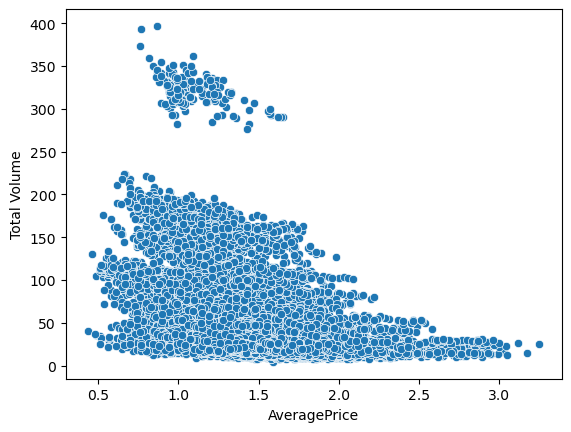

In [19]:
#let check visualization of our data
sns.scatterplot(x='AveragePrice',y='Total Volume',data=file)
plt.show()

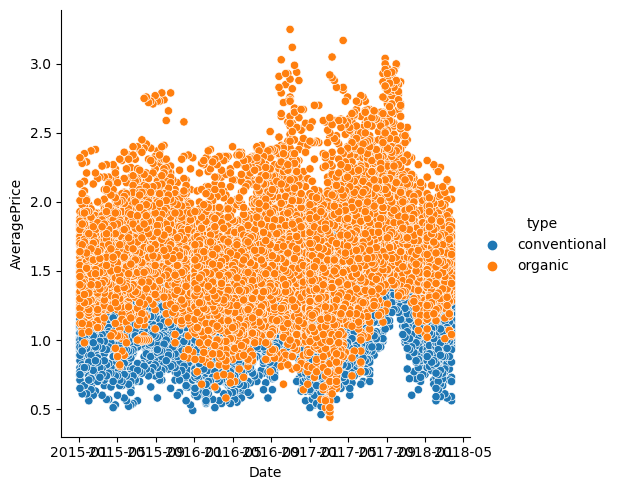

In [20]:
sns.relplot(x='Date',y='AveragePrice',hue='type',data=file)
plt.show()

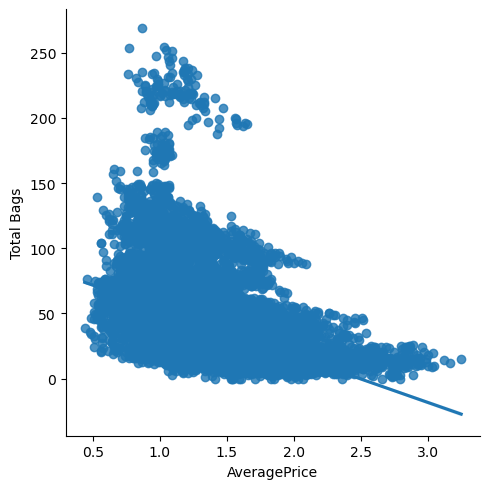

In [27]:
sns.lmplot(x= 'AveragePrice', y= 'Total Bags',data = file, palette= 'colourblind')

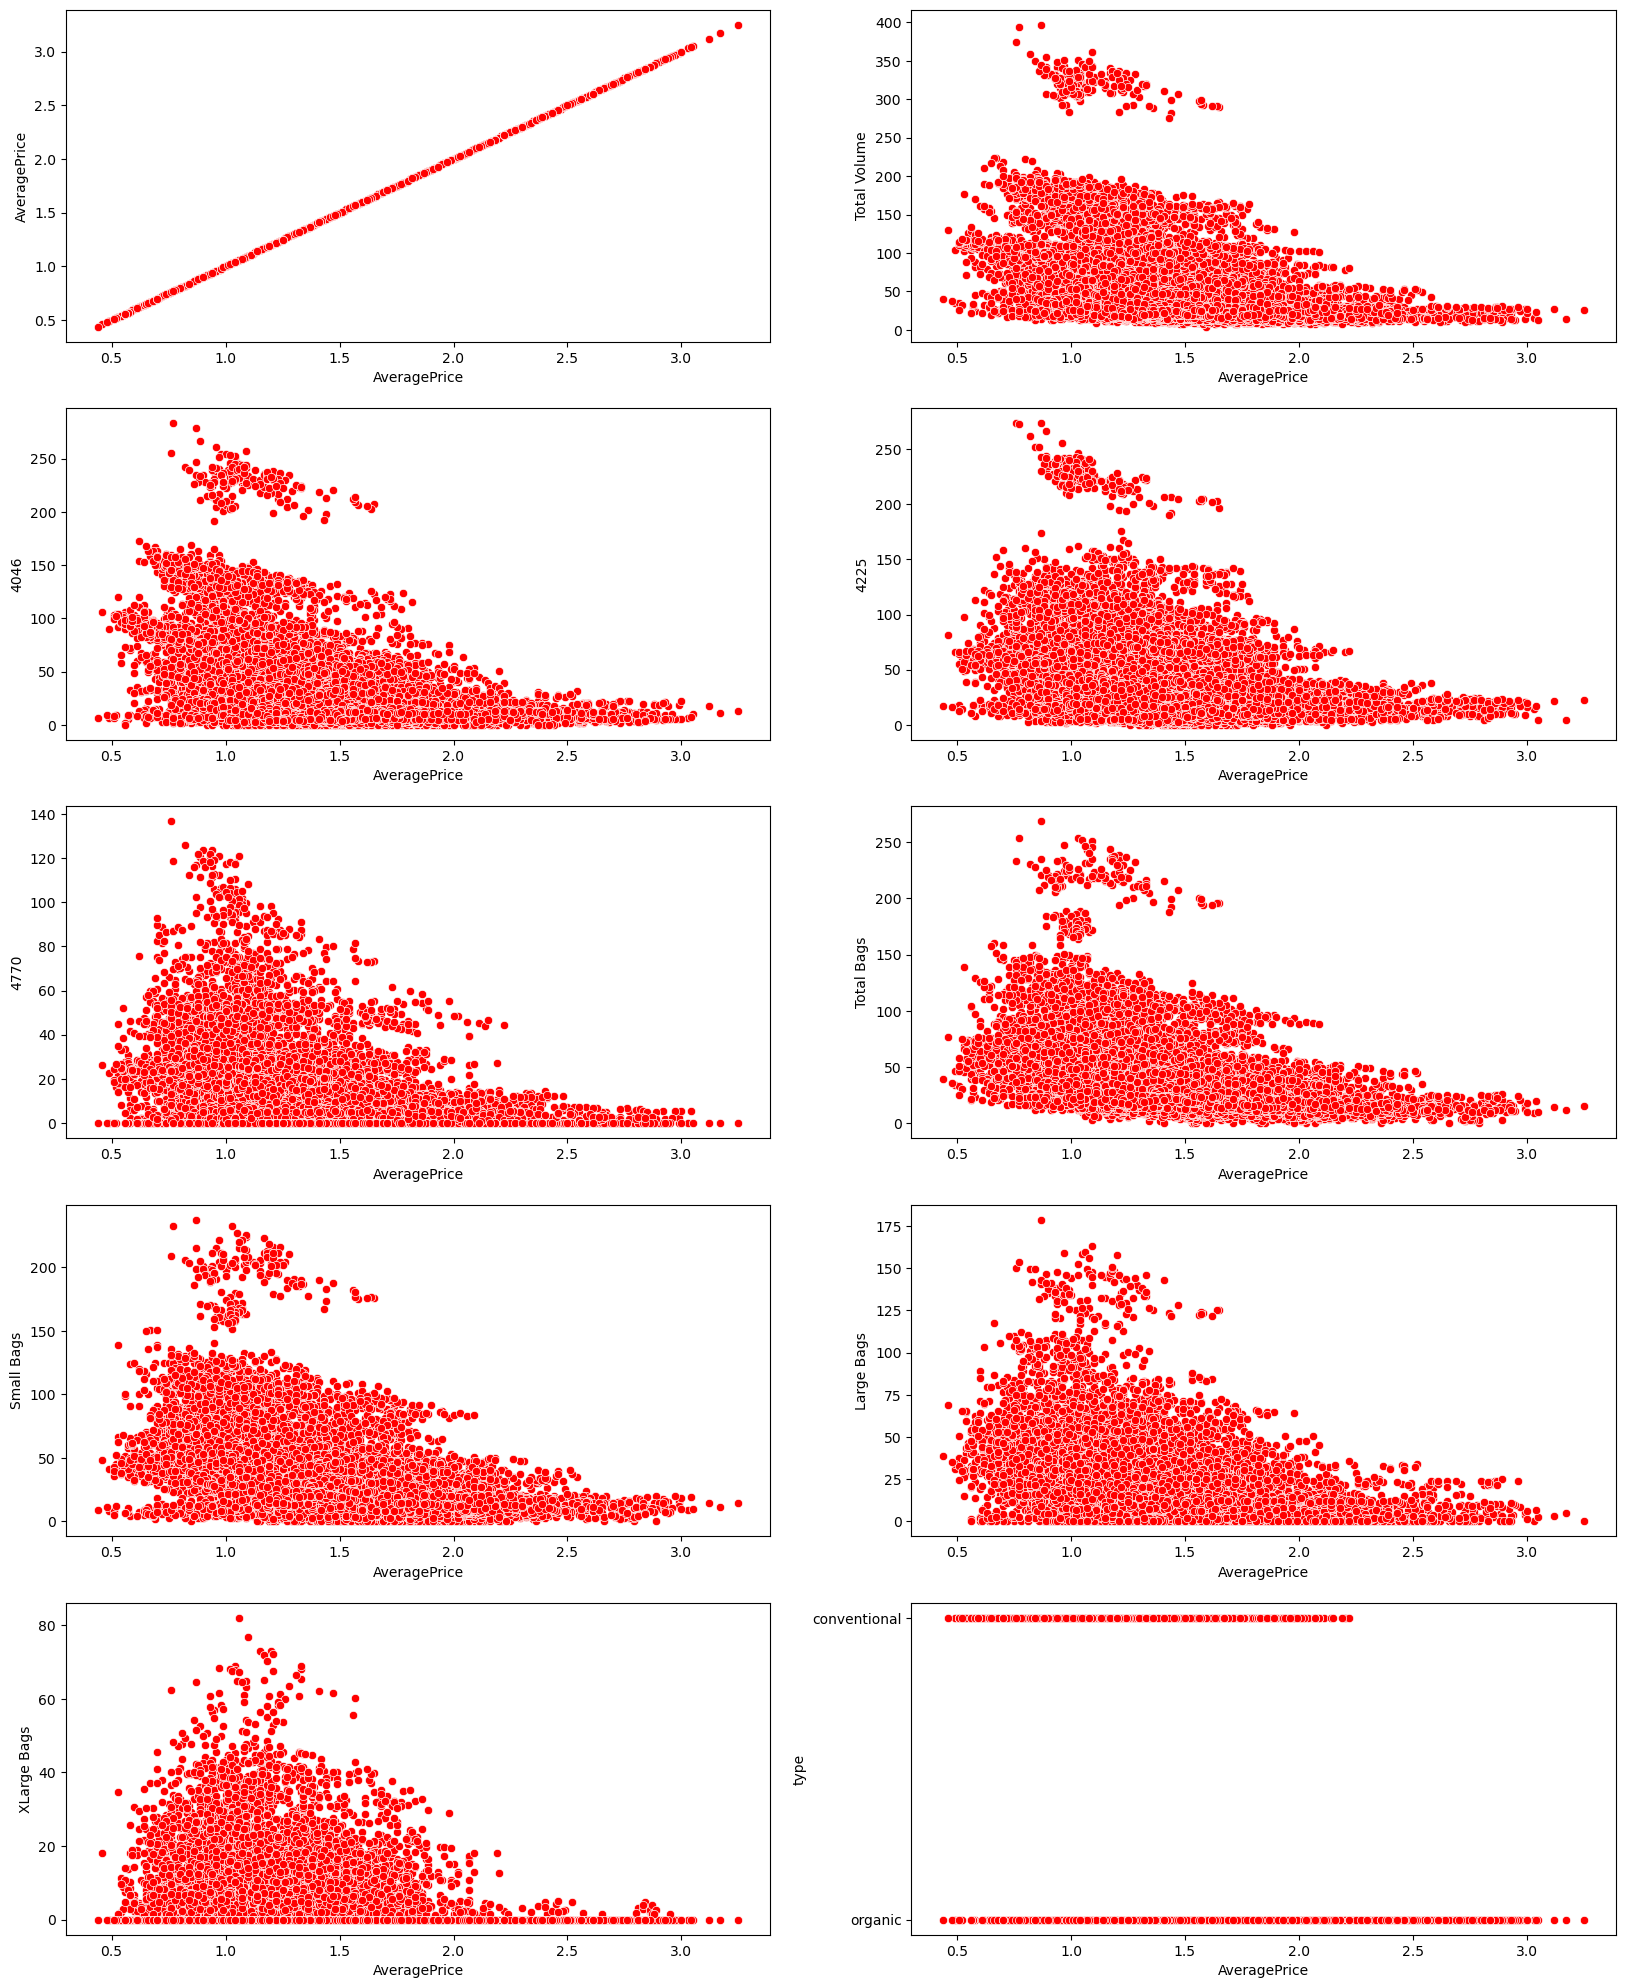

In [17]:
plt.figure(figsize=(20,25))
p=1
for i in file:
    if p<=10:
        plt.subplot(5,2,p)
        sns.scatterplot(x= 'AveragePrice',y= i,data=file,color='r')
        plt.xlabel('AveragePrice')
        plt.ylabel(i)
    p+=1

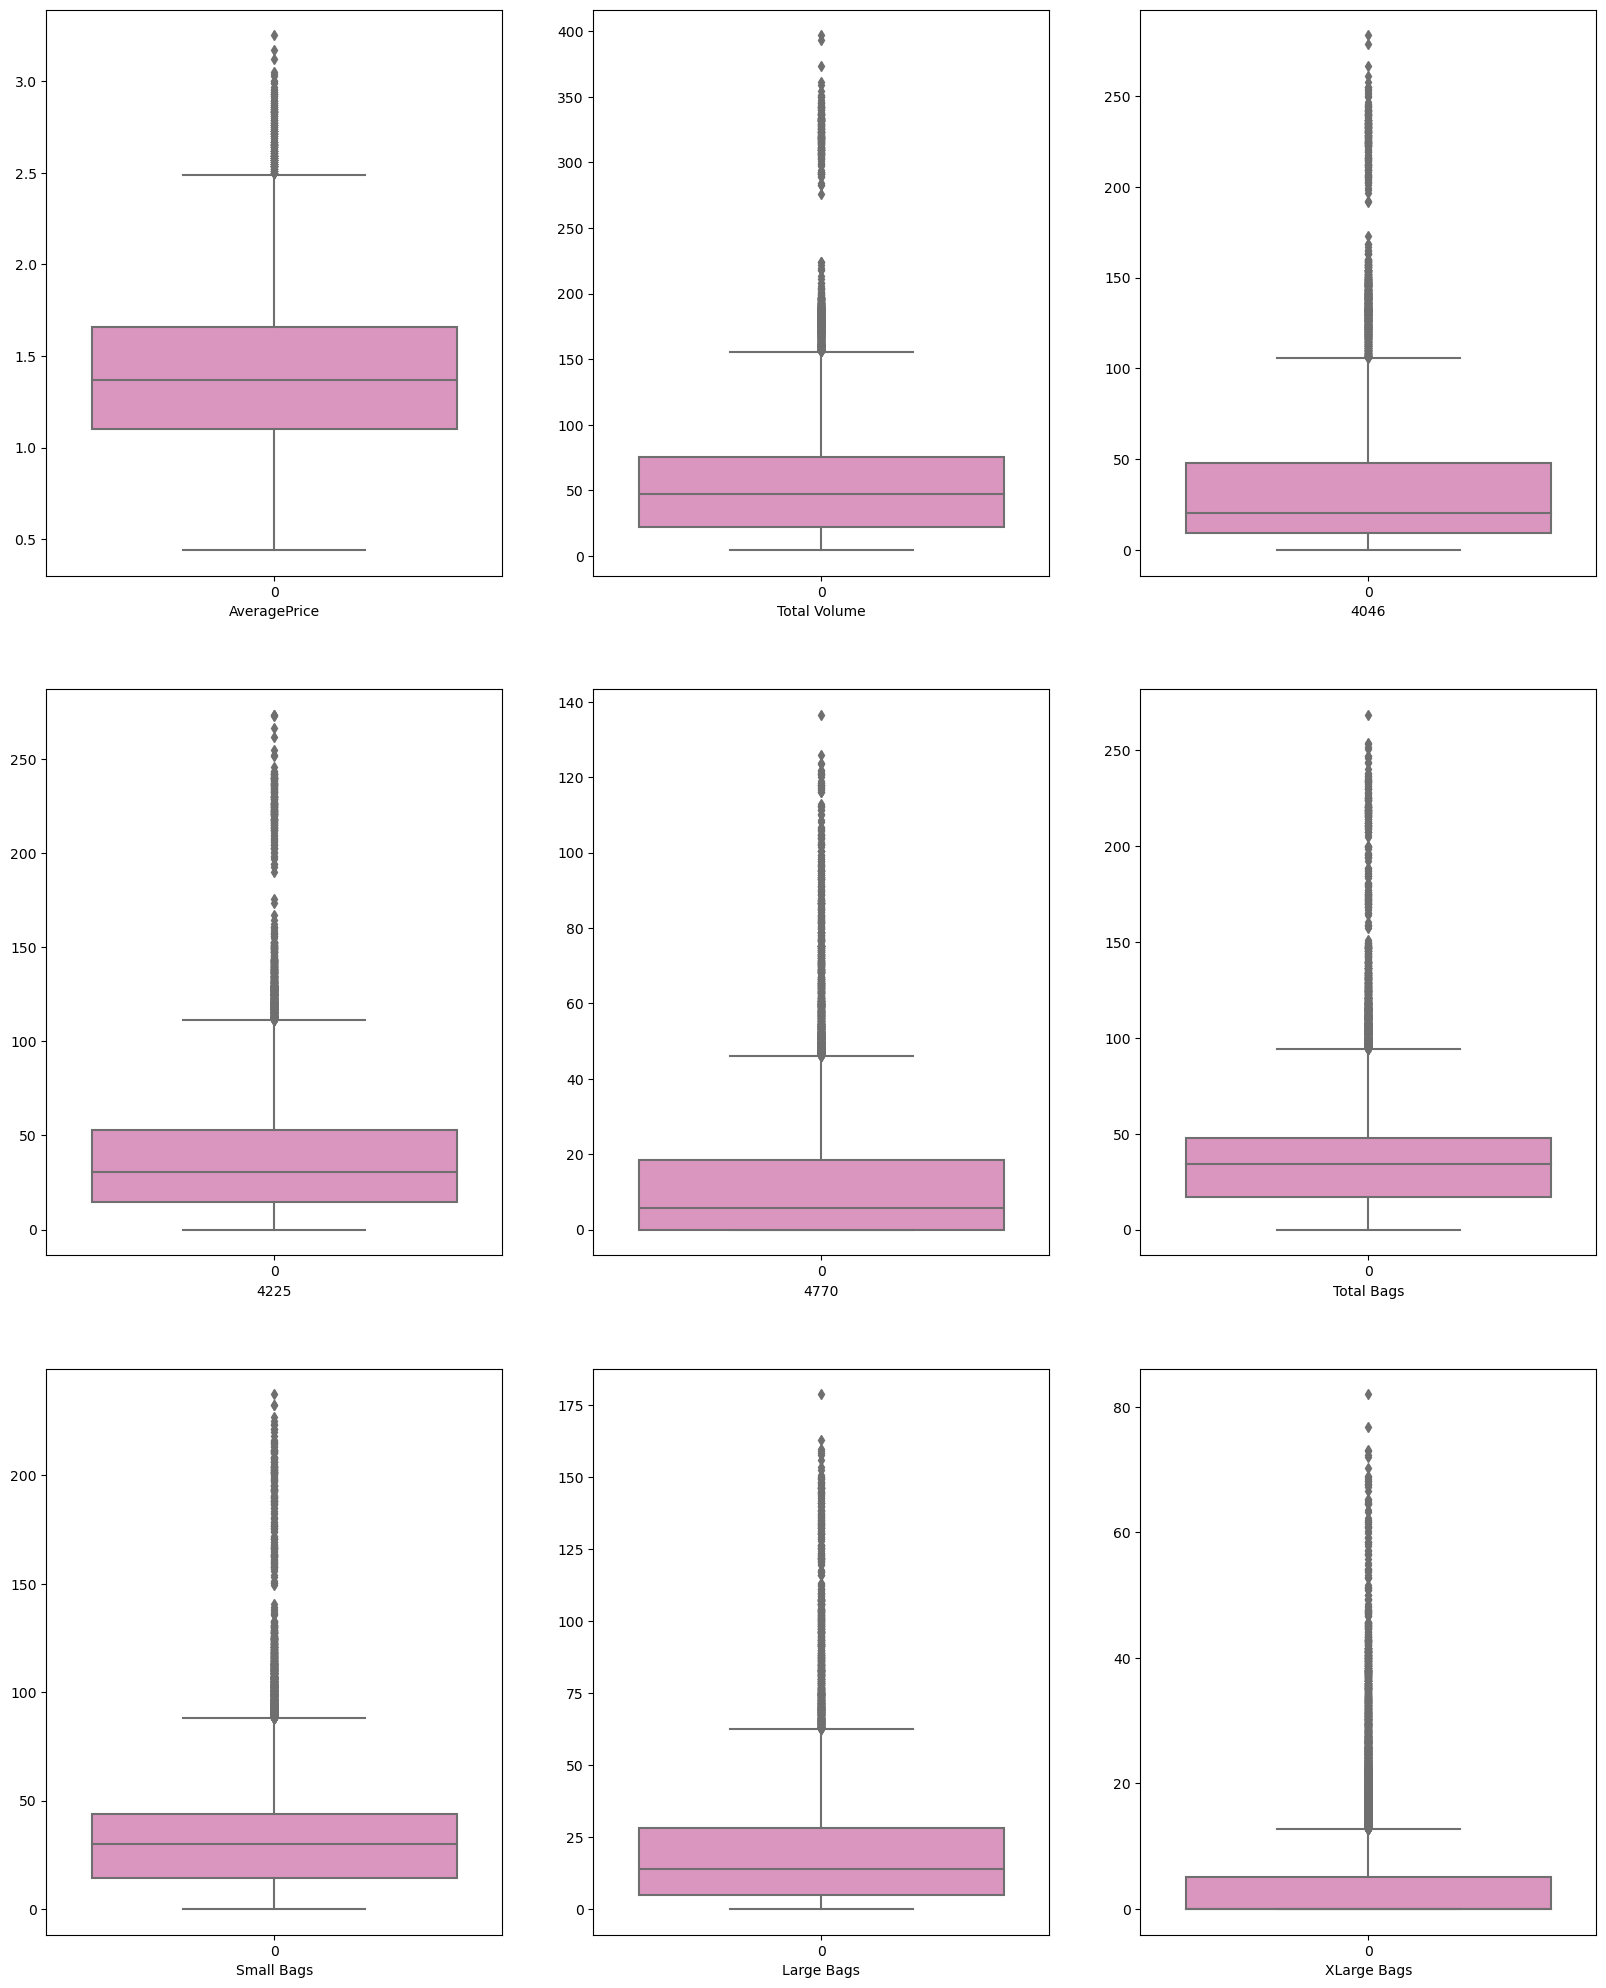

In [31]:
#lets check outlier by plot boxplot
plt.figure(figsize=(20,25))
p=1
for i in  numerical_col:
    if p<=9:
        plt.subplot(3,3,p)
        sns.boxplot(file[i], palette= 'Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()    
    

we see that too many outlierspresent in  hence remove  through zscore method

In [11]:
from scipy.stats import zscore

out_features = file[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z= np.abs(zscore(out_features))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
Date,,,,,,,,
2015-12-27,0.373714,0.659077,0.034740,0.516446,0.598284,0.499147,0.726623,0.497449
2015-12-20,0.416209,0.695853,0.104144,0.502067,0.578275,0.477634,0.723402,0.497449
2015-12-13,0.186355,0.682425,0.247649,0.430509,0.612653,0.514969,0.719251,0.497449
2015-12-06,0.314419,0.650891,0.070758,0.484502,0.681931,0.591191,0.699057,0.497449
2015-11-29,0.435033,0.667781,0.110236,0.480881,0.669753,0.580158,0.665220,0.497449
...,...,...,...,...,...,...,...,...
2018-02-04,0.670393,0.589007,0.788271,0.734478,0.493306,0.392824,0.582767,0.497449
2018-01-28,0.705946,0.645993,0.686526,0.734478,0.584109,0.489994,0.615341,0.497449
2018-01-21,0.707402,0.645975,0.732143,0.195392,0.580964,0.479098,0.776582,0.497449


In [12]:
#threshold=3
np.where(z>3)

(array([ 313,  326,  327, ..., 9112, 9113, 9113], dtype=int64),
 array([3, 3, 3, ..., 6, 4, 6], dtype=int64))

In [13]:
# now removing data above zscore and creating new dataframe
file1 = file[(z<3).all(axis=1)]
file1.shape

(17343, 11)

In [14]:
# thenwe checkthe coorelation between target and dependent variables
file1.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.530554,-0.536791,-0.422013,-0.446874,-0.507932,-0.458639,-0.445080,-0.295930
Total Volume,-0.530554,1.000000,0.889801,0.933823,0.767043,0.947021,0.930932,0.708742,0.565909
4046,-0.536791,0.889801,1.000000,0.713417,0.671748,0.810119,0.791760,0.645678,0.510590
4225,-0.422013,0.933823,0.713417,1.000000,0.750819,0.846376,0.842918,0.590961,0.513411
4770,-0.446874,0.767043,0.671748,0.750819,1.000000,0.682350,0.691215,0.452010,0.558443
Total Bags,-0.507932,0.947021,0.810119,0.846376,0.682350,1.000000,0.968374,0.776991,0.559100
Small Bags,-0.458639,0.930932,0.791760,0.842918,0.691215,0.968374,1.000000,0.621754,0.558297
Large Bags,-0.445080,0.708742,0.645678,0.590961,0.452010,0.776991,0.621754,1.000000,0.383108
XLarge Bags,-0.295930,0.565909,0.510590,0.513411,0.558443,0.559100,0.558297,0.383108,1.000000


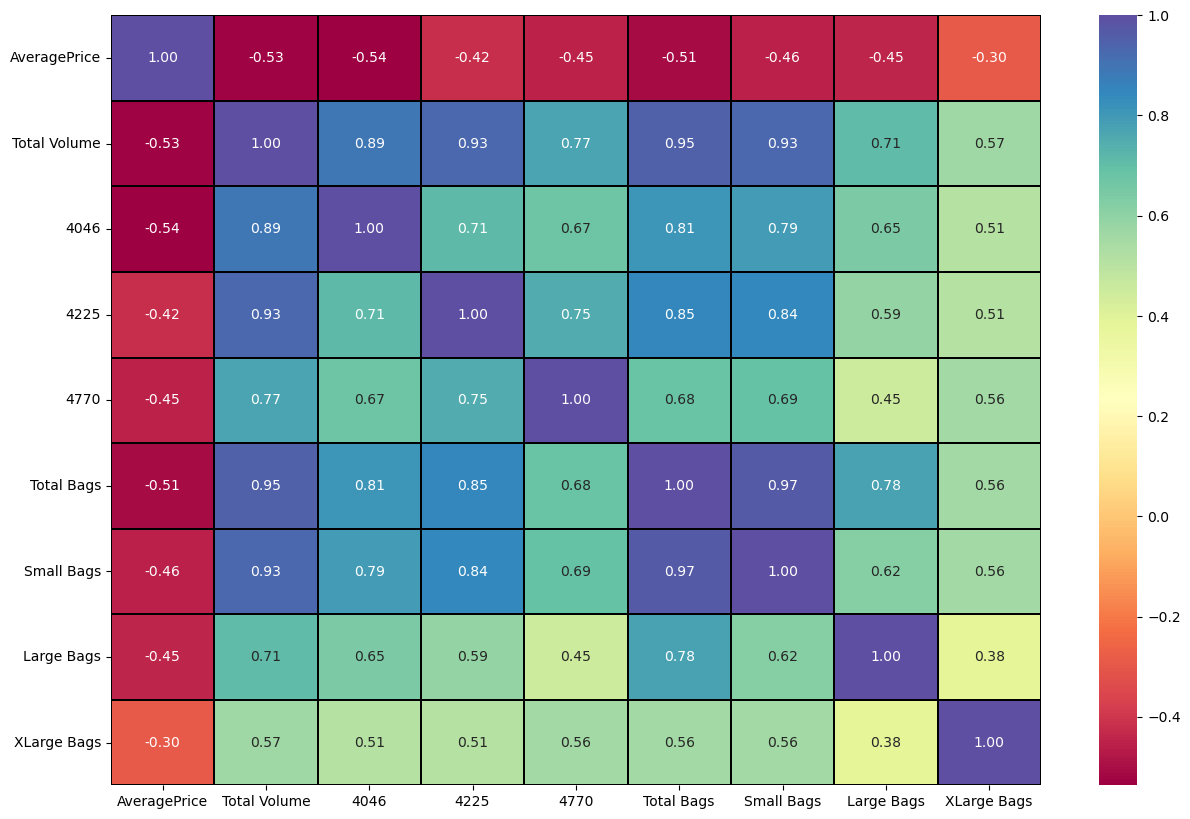

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(file1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'Spectral')
plt.show()

we can see that all feature are not correlated very well with target but its all them are correlated with each other soits 
slightly reduce the model performance but allther is well

In [16]:
# lets encode categorical data and made final dataframe
file2= pd.get_dummies(file1.drop('region',axis=1))

In [17]:
file2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic
Date,,,,,,,,,,,
2015-12-27,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,1,0
2015-12-20,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,1,0
2015-12-13,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,1,0
2015-12-06,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,1,0
2015-11-29,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,1,0


In [1]:
file2.shape

NameError: name 'file2' is not defined

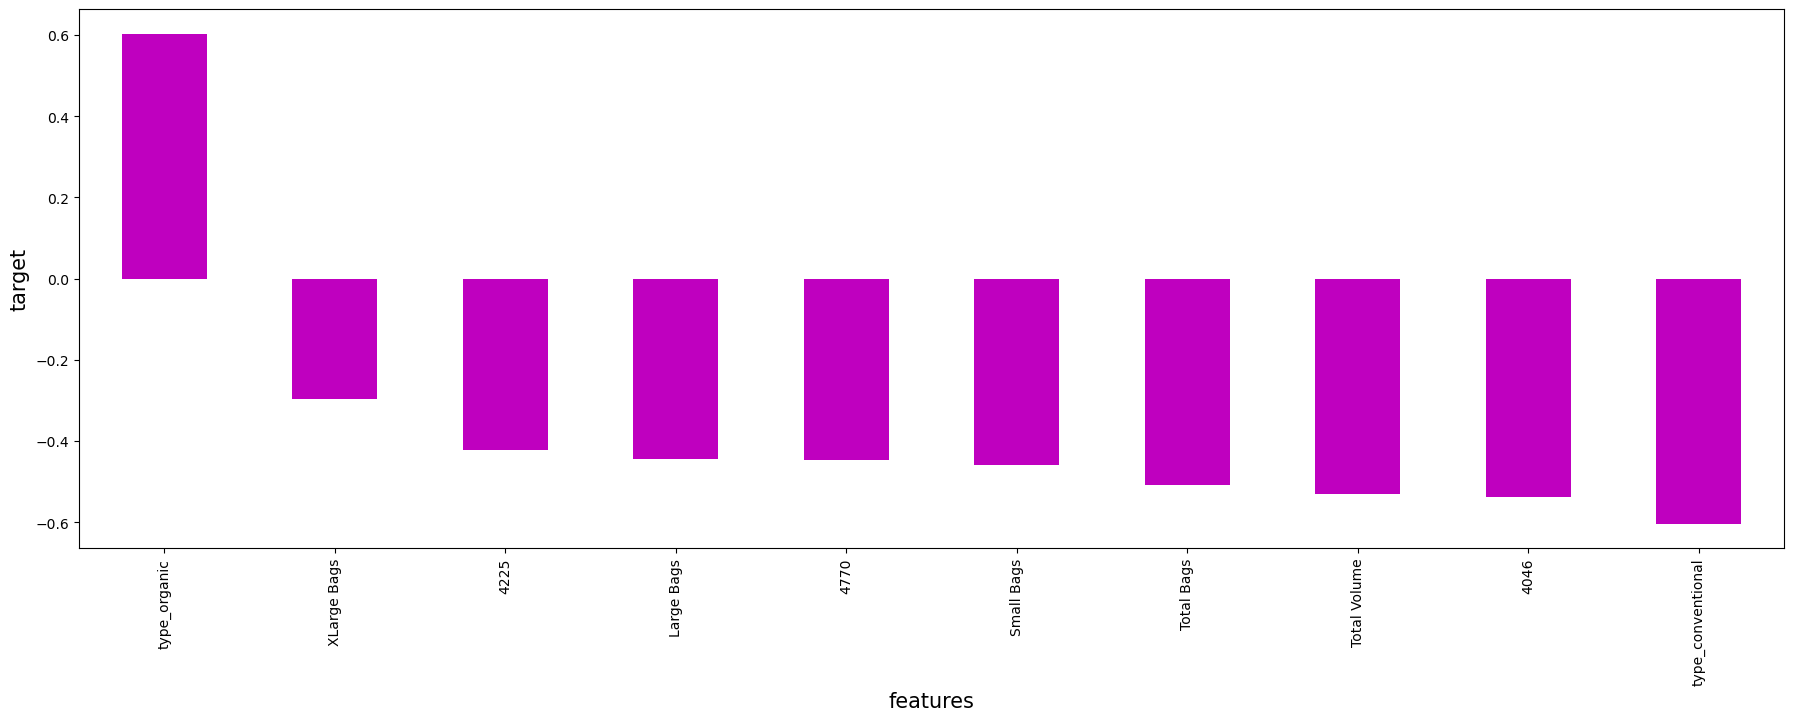

In [26]:
plt.figure(figsize=(22,7))
file2.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='m')
plt.xlabel('features',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.show()

In [19]:
#saperating variables into x and y
x=file2.drop('AveragePrice',axis=1)
y= file2['AveragePrice']

In [20]:
#scaling the featuresusing ss
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic
Date,,,,,,,,,,
2015-12-27,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,1,0
2015-12-20,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,1,0
2015-12-13,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,1,0
2015-12-06,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,1,0
2015-11-29,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,1,0


In [21]:
#model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [22]:
# create train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=124)

In [23]:
lr= LinearRegression()
lr.fit(x_train,y_train)
pred= lr.predict(x_test)
print('r2score : ',r2_score(y_test,pred))
print('mean absolute error :', mean_absolute_error(y_test,pred))
print('mean squared error :', mean_squared_error(y_test,pred))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))


r2score :  0.4669589625564057
mean absolute error : 0.22422864821018096
mean squared error : 0.0864538086009577
root mean squared error : 0.2940302851764724


In [24]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred1= dt.predict(x_test)
print('r2score : ',r2_score(y_test,pred1))
print('mean absolute error :', mean_absolute_error(y_test,pred1))
print('mean squared error :', mean_squared_error(y_test,pred1))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,pred1)))


r2score :  0.5071711142003082
mean absolute error : 0.18879108206803766
mean squared error : 0.07993180857197771
root mean squared error : 0.2827221402224766


In [25]:
rfc= RandomForestRegressor()
rfc.fit(x_train,y_train)
pred2= rfc.predict(x_test)
print('r2score : ',r2_score(y_test,pred2))
print('mean absolute error :', mean_absolute_error(y_test,pred2))
print('mean squared error :', mean_squared_error(y_test,pred2))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,pred2)))


r2score :  0.7522697103077722
mean absolute error : 0.1402302133384586
mean squared error : 0.04017932118777628
root mean squared error : 0.20044780165363818


In [26]:
gbt= GradientBoostingRegressor()
gbt.fit(x_train,y_train)
pred3= gbt.predict(x_test)
print('r2score : ',r2_score(y_test,pred))
print('mean absolute error :', mean_absolute_error(y_test,pred3))
print('mean squared error :', mean_squared_error(y_test,pred3))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,pred3)))


r2score :  0.4669589625564057
mean absolute error : 0.19315167799523936
mean squared error : 0.06635394014705859
root mean squared error : 0.2575925855824631


we have see that the random forest model  is best model because rmse valuee is lower than other model and accuracy is high 
with other model hence we tune the model for higher accracy achieved

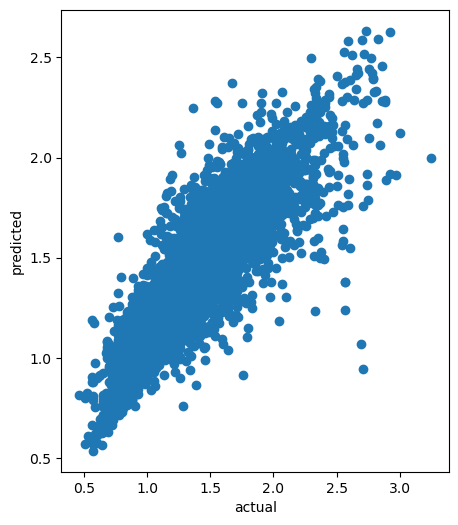

In [39]:
#lets check throgh plot
plt.figure(figsize=(5,6))
plt.scatter(x=y_test,y=pred2)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

in this graph the best fit line occers in randomforest model hence better fit to our dataset 

In [27]:
from sklearn.model_selection import GridSearchCV

params= {'max_depth':[10,20,30],'min_samples_split':[8,10,12],'n_estimators':[10,50,100]}

In [28]:
grid_search = GridSearchCV(estimator=rfc,param_grid=params)

In [29]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 50, 100]})

In [31]:
grid_search.best_params_

{'max_depth': 30, 'min_samples_split': 8, 'n_estimators': 100}

In [35]:
#now we chck to increase performance of our model with using this criteria and finalize our model
final_model= RandomForestRegressor(max_depth=20,min_samples_split=8,n_estimators=100)
final_model.fit(x_train,y_train)
pred_= final_model.predict(x_test)
print('r2score :\n ',r2_score(y_test,pred_))

r2score :
  0.7467617107668902


now our model is randomforest and proceed with this model